In [1]:
import sys
sys.path.append("../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt

from XRaySimulation import util, Crystal, Motors, Pulse, Sensors, DeviceSimu

# Define the photon energy

In [2]:
photonEnergy = 9.8 # keV
kin = np.zeros(3, dtype=np.float64)
kin[2] = util.kev_to_wavevec_length(photonEnergy)

# Define the crystal

In [3]:
channelCut1 = Crystal.ChannelCut(
    crystal_type="Silicon",
                 miller_index="220",
                 energy_keV=photonEnergy,
                 thickness_list=np.array([1e4, 1e4]),
                 gap=1e4,
                 edge_length_list=np.array([5e4, 5e4]),
                 asymmetry_angle_list=np.deg2rad(np.array([0., 0.])),
                 first_surface_loc="lower left",
                 source="crystal_property_Silicon_220_9.80keV.pickle",)

# Define the motionStack

In [4]:
motionStack = Motors.CrystalTower_1236(channelCut=channelCut1)

# Show the Channel Cut crystal

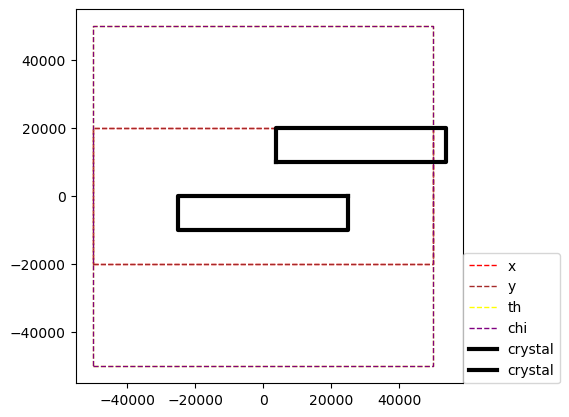

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figwidth(5)
fig.set_figheight(5)

motionStack.plot_motors(ax=ax)

ax.set_aspect(1)
ax.legend(loc=(1,0))
plt.show()

# Align the crystal to the incident x-ray pulse

Motor moved to -0.34 rad


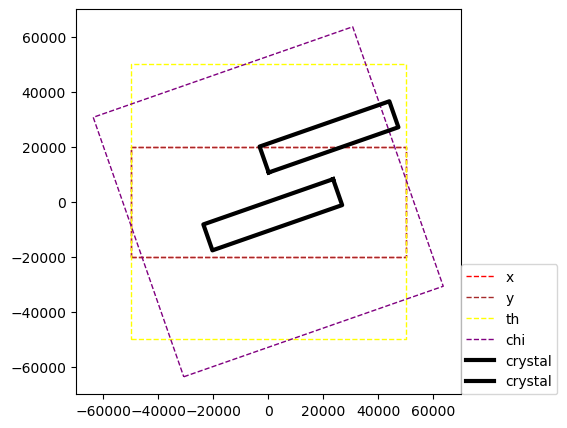

In [6]:
# Get the rotation matrix
rotMatAlign, rotangle, angles, rocking_curve, b_array = DeviceSimu.get_channel_cut_auto_align_rotMat(channelcut=channelCut1,
                                                           kin=kin,
                                                           rotationAxis=motionStack.th.physical_rotation_axis,
                                                           scan_range=0.0005,
                                                           scan_number=10000,
                                                           rot_center=None,
                                                           get_curve=True)

# Align the motion stack
motionStack.th_umv(target=rotangle)

# Show the aligned device
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figwidth(5)
fig.set_figheight(5)

motionStack.plot_motors(ax=ax)

ax.set_aspect(1)
ax.legend(loc=(1,0))
plt.show()

# Get the reflectivity

In [7]:
# get some random pulses
sasePulseXPP, pulseEnergy, k_array_keV, k_vec = Pulse.get_1D_GaussianPulse_array(pulseNum=120,
                                                                                 nk=300,
                                                                                 dk_keV=1e-5,
                                                                                 nGaussian=10,
                                                                                 modeSize_keV=1e-4,
                                                                                 modeCenterSpread_keV=0.5e-3,
                                                                                 pulseEnergyCenter_uJ=3,
                                                                                 pulseEnergySigma_uJ=1, )

In [8]:
spectrumIntensity = np.square(np.abs(sasePulseXPP))

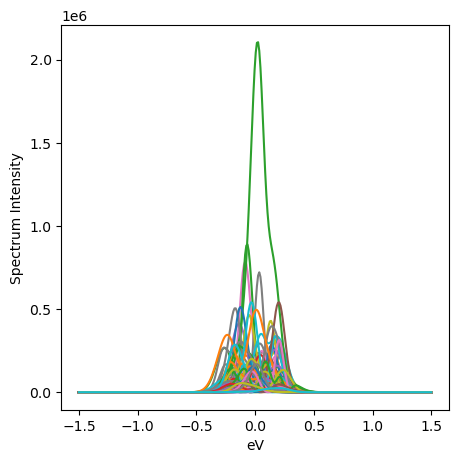

In [9]:
# Show the aligned device
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figwidth(5)
fig.set_figheight(5)

for pulseIdx in range(spectrumIntensity.shape[0]):
    ax.plot(k_array_keV * 1000, spectrumIntensity[pulseIdx, :])

ax.set_xlabel("eV")
ax.set_ylabel("Spectrum Intensity")
#ax.legend(loc=(1,0))
plt.show()

# get reflectivity

In [10]:
(reflectivity_s, 
 reflectivity_p, 
 b_array,
 kout_array) = DeviceSimu.get_reflectivity_channel_cut(kin_array = k_vec + kin[np.newaxis, :],
                                                       channelCut= channelCut1)

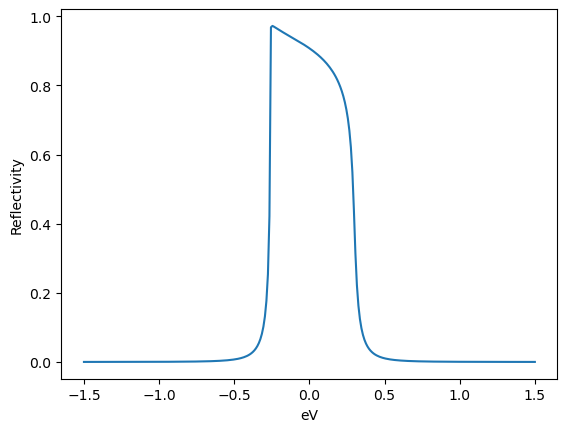

In [11]:
plt.plot(k_array_keV * 1000, np.square(np.abs(reflectivity_s)))
plt.xlabel("eV")
plt.ylabel("Reflectivity")
plt.show()

# Get the diode output

In [12]:
(pulseEnergyReadOut, 
 pulseEnergy) = Sensors.get_intensity_with_spectrum_and_reflectivity(spectrum_array=sasePulseXPP,
                                                                      dk_keV = 1e-5,
                                                                      reflectivity = reflectivity_s,
                                                                      relative_noise_level = 0.15)  # 15% of measurement error

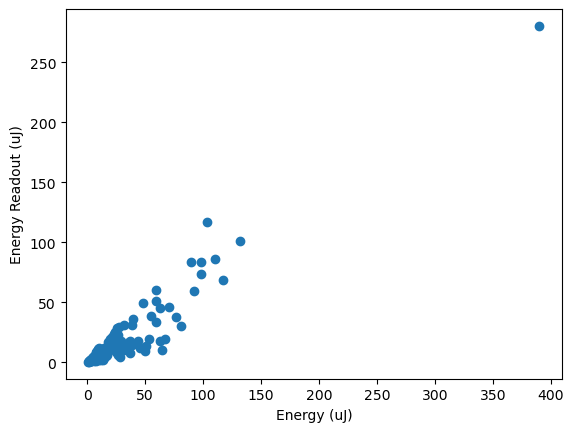

In [13]:
plt.scatter(pulseEnergy, pulseEnergyReadOut)
plt.xlabel("Energy (uJ)")
plt.ylabel("Energy Readout (uJ)")
plt.show()

# Rotate the crystal a little bit

In [14]:
motionStack.th.control_location

-0.335734157118695

In [15]:
np.deg2rad(1)

0.017453292519943295

Motor moved to -0.34 rad


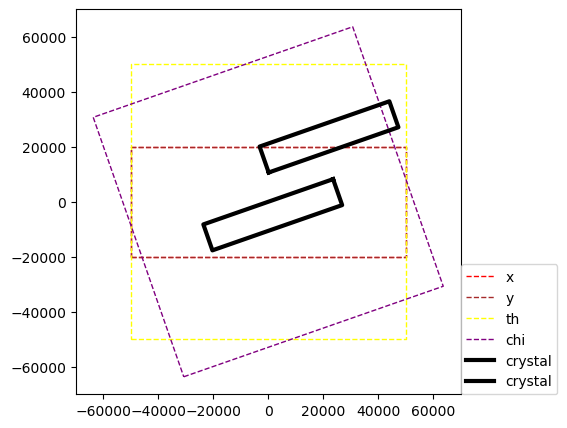

In [21]:
# Align the motion stack
motionStack.th_umv(target=rotangle + np.deg2rad(0.001))

# Show the aligned device
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figwidth(5)
fig.set_figheight(5)

motionStack.plot_motors(ax=ax)

ax.set_aspect(1)
ax.legend(loc=(1,0))
plt.show()

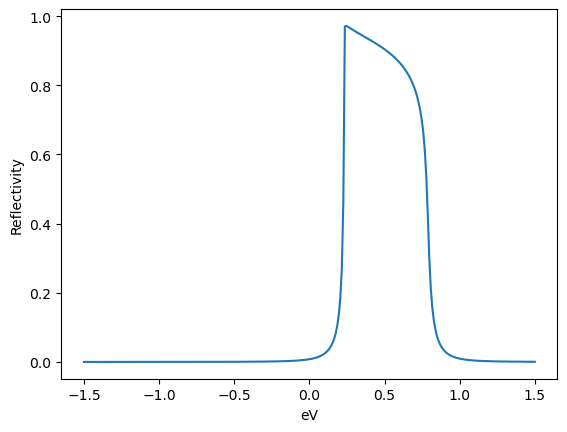

In [22]:
# Get reflectivity
(reflectivity_s, 
 reflectivity_p, 
 b_array,
 kout_array) = DeviceSimu.get_reflectivity_channel_cut(kin_array = k_vec + kin[np.newaxis, :],
                                                       channelCut= channelCut1)

plt.plot(k_array_keV * 1000, np.square(np.abs(reflectivity_s)))
plt.xlabel("eV")
plt.ylabel("Reflectivity")
plt.show()

In [23]:
(pulseEnergyReadOut, 
 pulseEnergy) = Sensors.get_intensity_with_spectrum_and_reflectivity(spectrum_array=sasePulseXPP,
                                                                      dk_keV = 1e-5,
                                                                      reflectivity = reflectivity_s,
                                                                      relative_noise_level = 0.15)  # 15% of measurement error

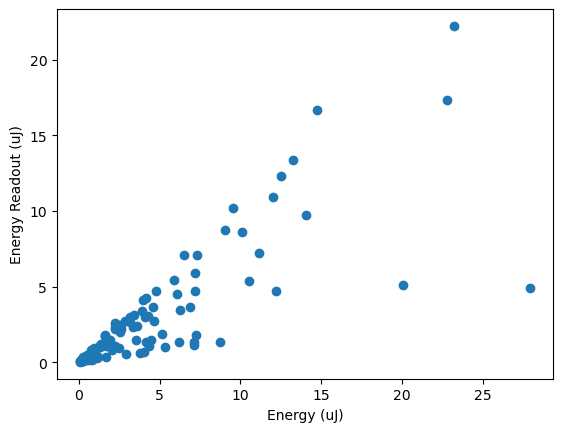

In [24]:
plt.scatter(pulseEnergy, pulseEnergyReadOut)
plt.xlabel("Energy (uJ)")
plt.ylabel("Energy Readout (uJ)")
plt.show()